In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
import warnings
warnings.filterwarnings("ignore")

In [371]:
df=pd.read_csv('/content/WA_Fn-UseC_-Accounts-Receivable.csv')

In [372]:
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [298]:
df.shape

(2466, 12)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


<Axes: >

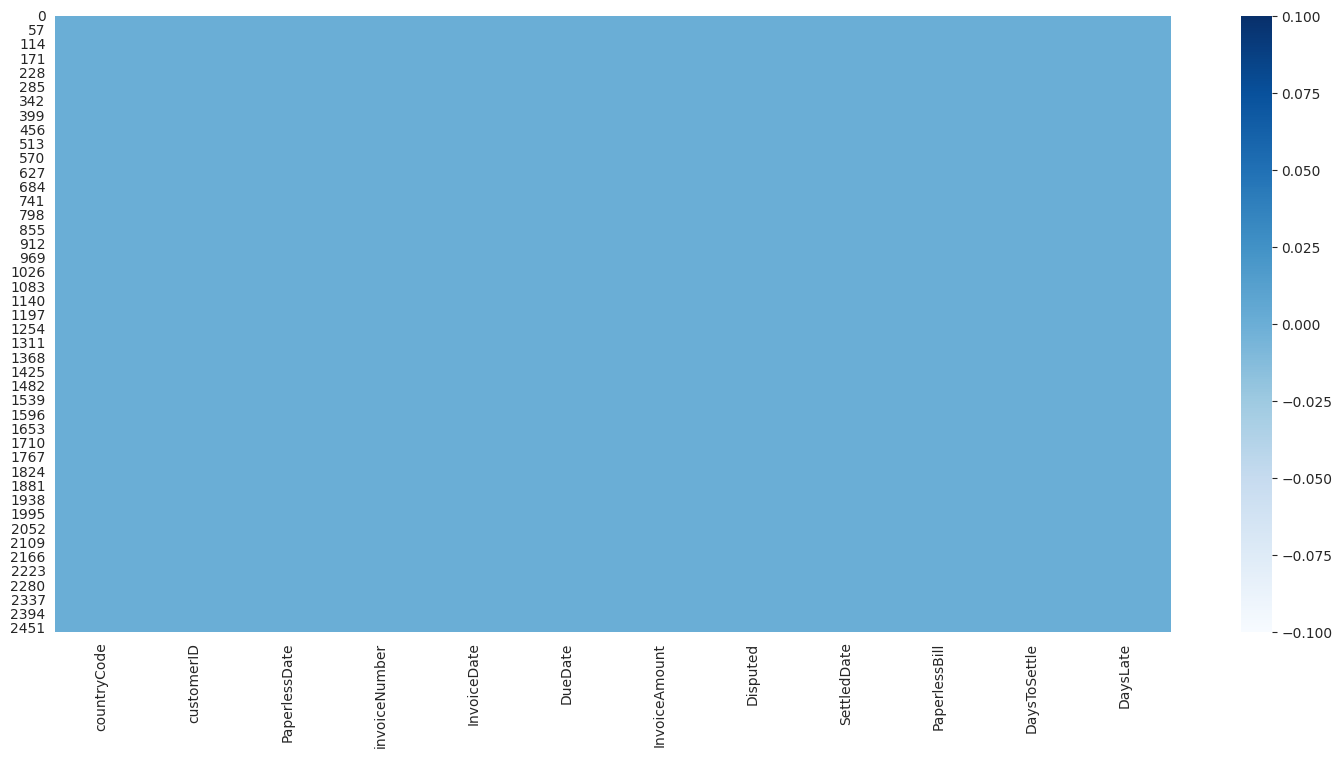

In [300]:
sns.heatmap(df.isnull(),cmap='Blues')

In [301]:
df.isnull().sum()

countryCode      0
customerID       0
PaperlessDate    0
invoiceNumber    0
InvoiceDate      0
DueDate          0
InvoiceAmount    0
Disputed         0
SettledDate      0
PaperlessBill    0
DaysToSettle     0
DaysLate         0
dtype: int64

In [302]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
countryCode,2466.0,6.204461e+02,2.159336e+02,391.00,4.060000e+02,7.700000e+02,8.180000e+02,8.970000e+02
invoiceNumber,2466.0,4.978431e+09,2.884272e+09,611365.00,2.528854e+09,4.964228e+09,7.494512e+09,9.990244e+09
InvoiceAmount,2466.0,5.989586e+01,2.043584e+01,5.26,4.640000e+01,6.056000e+01,7.376500e+01,1.282800e+02
DaysToSettle,2466.0,2.644485e+01,1.233493e+01,0.00,1.800000e+01,2.600000e+01,3.500000e+01,7.500000e+01
DaysLate,2466.0,3.442417e+00,6.290607e+00,0.00,0.000000e+00,0.000000e+00,5.000000e+00,4.500000e+01


In [303]:
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [304]:
#split year from Duedate
df['year']=pd.to_datetime(df['DueDate']).dt.year

In [305]:
# Assign countryCode with country name
df['countryName'] = df['countryCode'].replace({ 391:'Germany',406:'Australia',818:'California, US',897:'Kansas, US',770:'Georgia, US' })
df.drop('countryCode',axis = 1,inplace = True)

country_frame = pd.DataFrame({'Germany':[391],'Australia':[406], 'California, US':[818],'Kansas, US ':[897], 'Georgia, US':[770] })
country_frame

,Germany,Australia,"California, US","Kansas, US","Georgia, US"
0,391,406,818,897,770


In [306]:
#Store Year 2012
year_2012=df[df['year']==2012]
year_2012.head()

,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,year,countryName
4,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,2012,"California, US"
5,5148-SYKLB,8/28/2013,18104516,1/27/2012,2/26/2012,94.00,Yes,2/22/2012,Paper,26,0,2012,"California, US"
8,3831-FXWYK,3/8/2013,28049695,5/14/2012,6/13/2012,80.07,Yes,7/1/2012,Paper,48,18,2012,"Georgia, US"
10,3993-QUNVJ,12/31/2012,35868002,3/31/2012,4/30/2012,75.33,No,4/16/2012,Paper,16,0,2012,"Georgia, US"
13,9117-LYRCE,7/5/2013,41324194,10/21/2012,11/20/2012,57.17,No,11/30/2012,Paper,40,10,2012,Australia


In [307]:
#Store Year 2013
year_2013=df[df['year']==2013]
year_2013.head()

,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,year,countryName
0,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,2013,Germany
1,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,2013,Australia
2,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,2013,Germany
3,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,2013,Australia
6,8690-EEBEO,12/5/2012,23864272,8/13/2013,9/12/2013,74.69,No,9/9/2013,Electronic,27,0,2013,"Kansas, US"


In [308]:
#Store Year 2014
year_2014=df[df['year']==2014]
year_2014.head()

,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,year,countryName
543,7209-MDWKR,10/9/2013,2189582262,12/2/2013,1/1/2014,67.69,No,12/28/2013,Electronic,26,0,2014,Germany
599,8887-NCUZC,1/22/2013,2455126326,12/2/2013,1/1/2014,49.51,No,1/7/2014,Electronic,36,6,2014,"California, US"
2046,9149-MATVB,4/30/2013,8249581875,12/2/2013,1/1/2014,38.50,No,12/16/2013,Electronic,14,0,2014,"Georgia, US"
2326,6391-GBFQJ,11/25/2013,9366628825,12/2/2013,1/1/2014,18.05,No,12/13/2013,Electronic,11,0,2014,"Kansas, US"
2425,6391-GBFQJ,11/25/2013,9835528694,12/2/2013,1/1/2014,8.38,Yes,12/30/2013,Electronic,28,0,2014,"Kansas, US"


<Axes: >

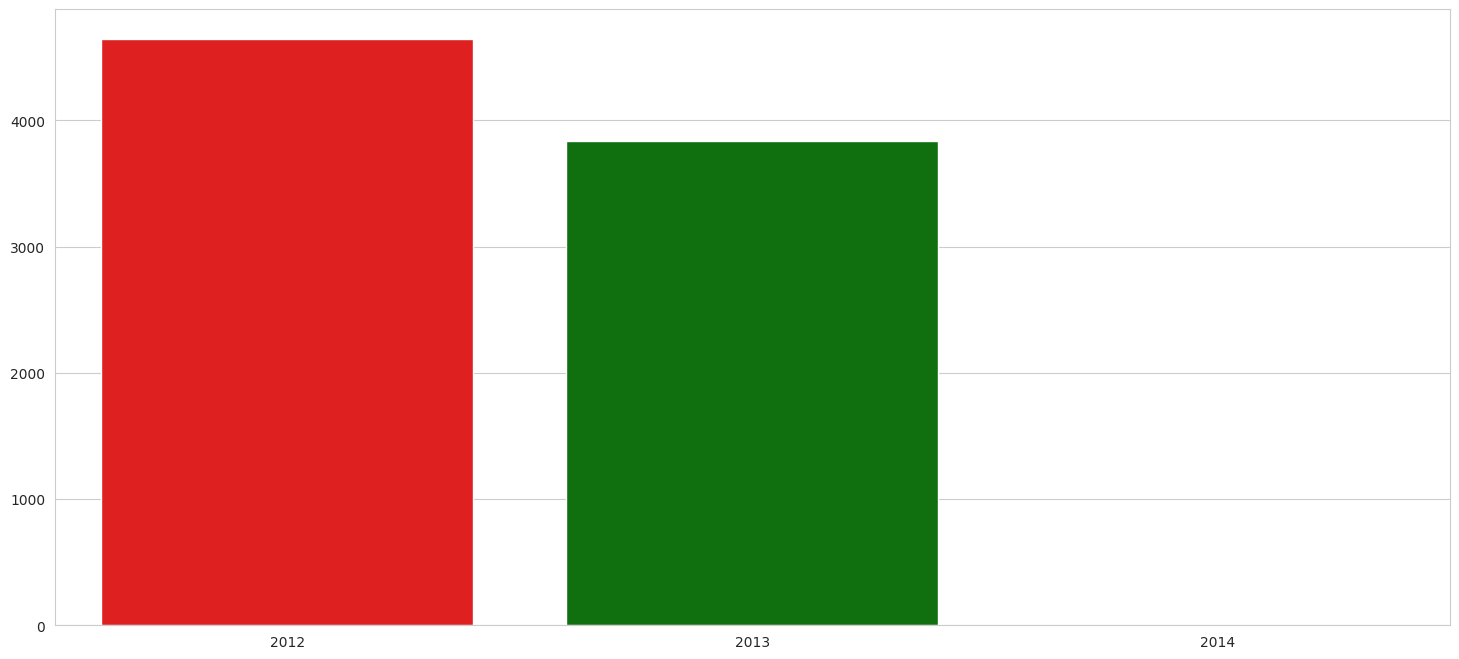

In [309]:
sns.barplot(x=[2012, 2013, 2014], y=[year_2012['DaysLate'].sum(), year_2013['DaysLate'].sum(), year_2014['DaysLate'].sum()], palette=['red', 'green', 'blue'])

The significant increase in late payments during the years 2012 and 2013, followed by a sharp decline in 2014, indicates potential improvements in business processes, client engagement, economic conditions, and operational efficiencies. Further qualitative analysis and stakeholder consultations would be beneficial to gain deeper insights into the factors driving these trends and to establish effective strategies for maintaining timely payment patterns in the future.

In [310]:
df.head()

,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,year,countryName
0,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,2013,Germany
1,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,2013,Australia
2,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,2013,Germany
3,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,2013,Australia
4,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,2012,"California, US"


In [311]:
df['countryName'].value_counts()

Germany           616
Australia         561
Georgia, US       506
Kansas, US        396
California, US    387
Name: countryName, dtype: int64

In [312]:
Germany=df[df['countryName']=='Germany']
Australia=df[df['countryName']=='Australia']
Georgia=df[df['countryName']=='Georgia, US']
Kansas=df[df['countryName']=='Kansas, US']
California=df[df['countryName']=='California, US']

<Axes: >

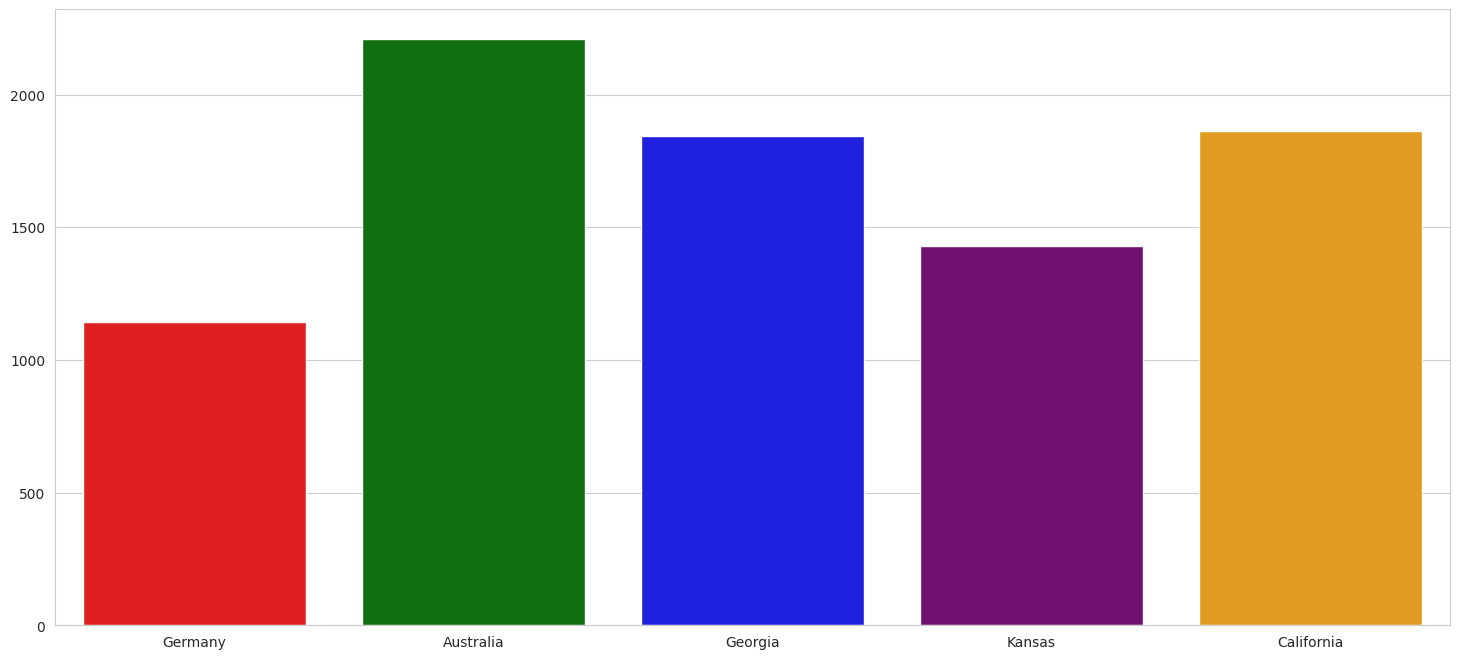

In [313]:
sns.barplot(x=['Germany', 'Australia', 'Georgia','Kansas','California'], y=[Germany['DaysLate'].sum(), Australia['DaysLate'].sum(), Georgia['DaysLate'].sum(),Kansas['DaysLate'].sum()
,California['DaysLate'].sum()],palette=['red', 'green', 'blue','purple','orange'])

<ipython-input-314-75f2f29294cf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  keys = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).keys())
<ipython-input-314-75f2f29294cf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  items = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).values())


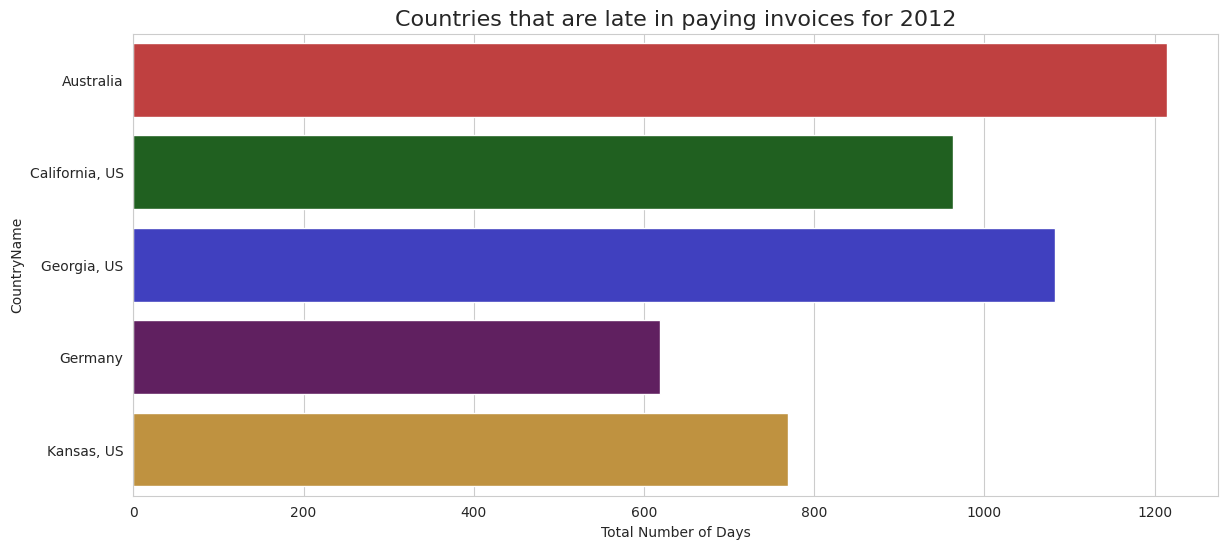

In [314]:
keys = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).values())


plt.figure(figsize = (14,6))
sns.set_style('whitegrid')

sns.barplot(x=items, y=keys, palette=['red', 'green', 'blue','purple','orange'], saturation=.5)
plt.title('Countries that are late in paying invoices for 2012', fontsize = 16)
plt.xlabel('Total Number of Days')
plt.ylabel('CountryName')
plt.show()


<ipython-input-315-f9336e1bb3ab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  keys = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).keys())
<ipython-input-315-f9336e1bb3ab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  items = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).values())


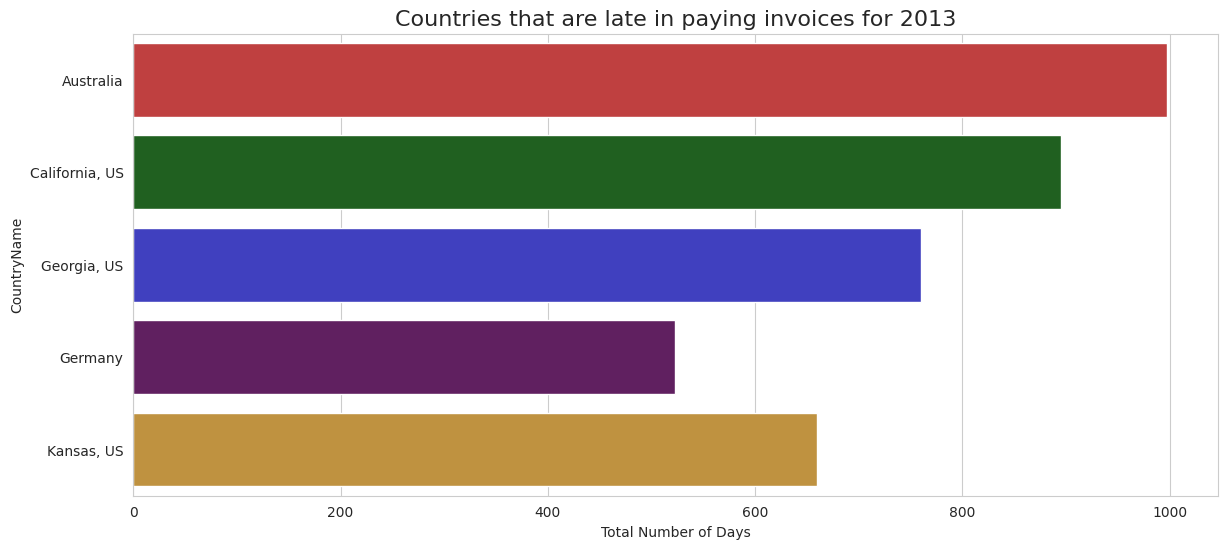

In [315]:
keys = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).values())

plt.figure(figsize = (14,6))
sns.set_style('whitegrid')

sns.barplot(x=items, y=keys, palette=['red', 'green', 'blue','purple','orange'], saturation=.5)
plt.title('Countries that are late in paying invoices for 2013', fontsize = 16)
plt.xlabel('Total Number of Days')
plt.ylabel('CountryName')
plt.show()

<ipython-input-316-c3b2a9be6d5d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  keys = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).keys())
<ipython-input-316-c3b2a9be6d5d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  items = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).values())


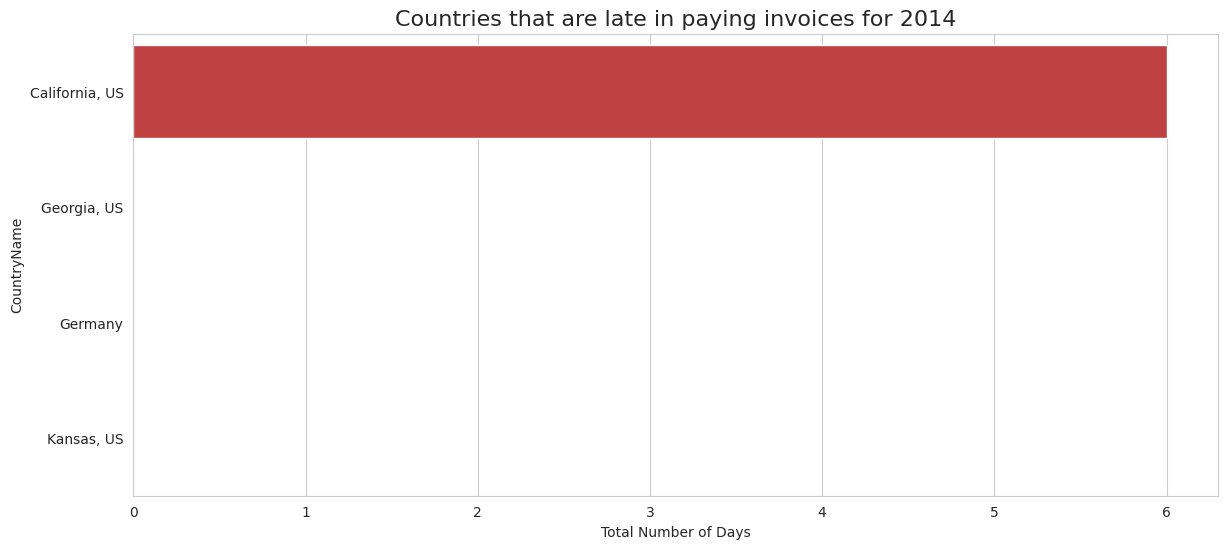

In [316]:
keys = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).values())

plt.figure(figsize = (14,6))
sns.set_style('whitegrid')

sns.barplot(x=items, y=keys,palette=['red', 'green', 'blue','purple','orange'], saturation=.5)
plt.title('Countries that are late in paying invoices for 2014', fontsize = 16)
plt.xlabel('Total Number of Days')
plt.ylabel('CountryName')
plt.show()

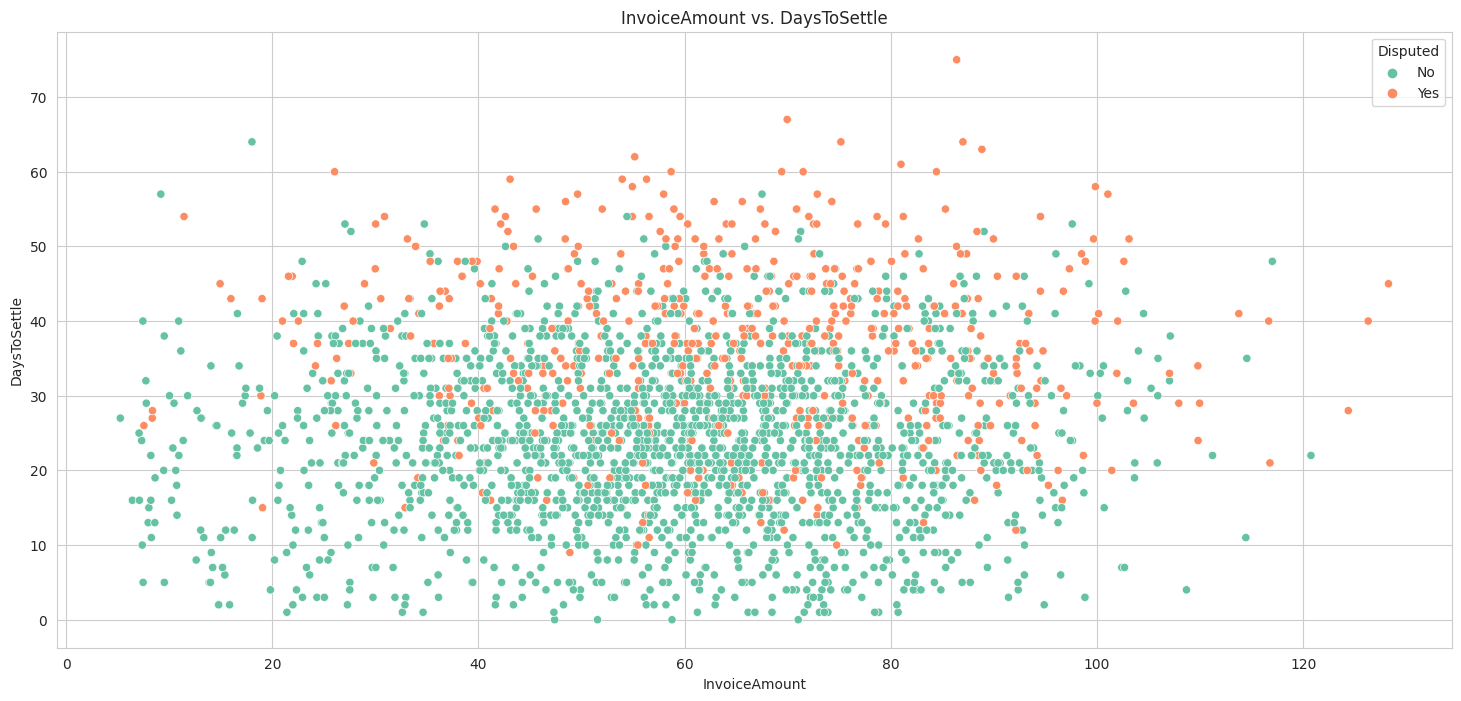

In [317]:
# Scatter plot of InvoiceAmount vs. DaysToSettle
sns.scatterplot(x='InvoiceAmount', y='DaysToSettle', data=df, hue='Disputed', palette='Set2')
plt.title('InvoiceAmount vs. DaysToSettle')
plt.show()


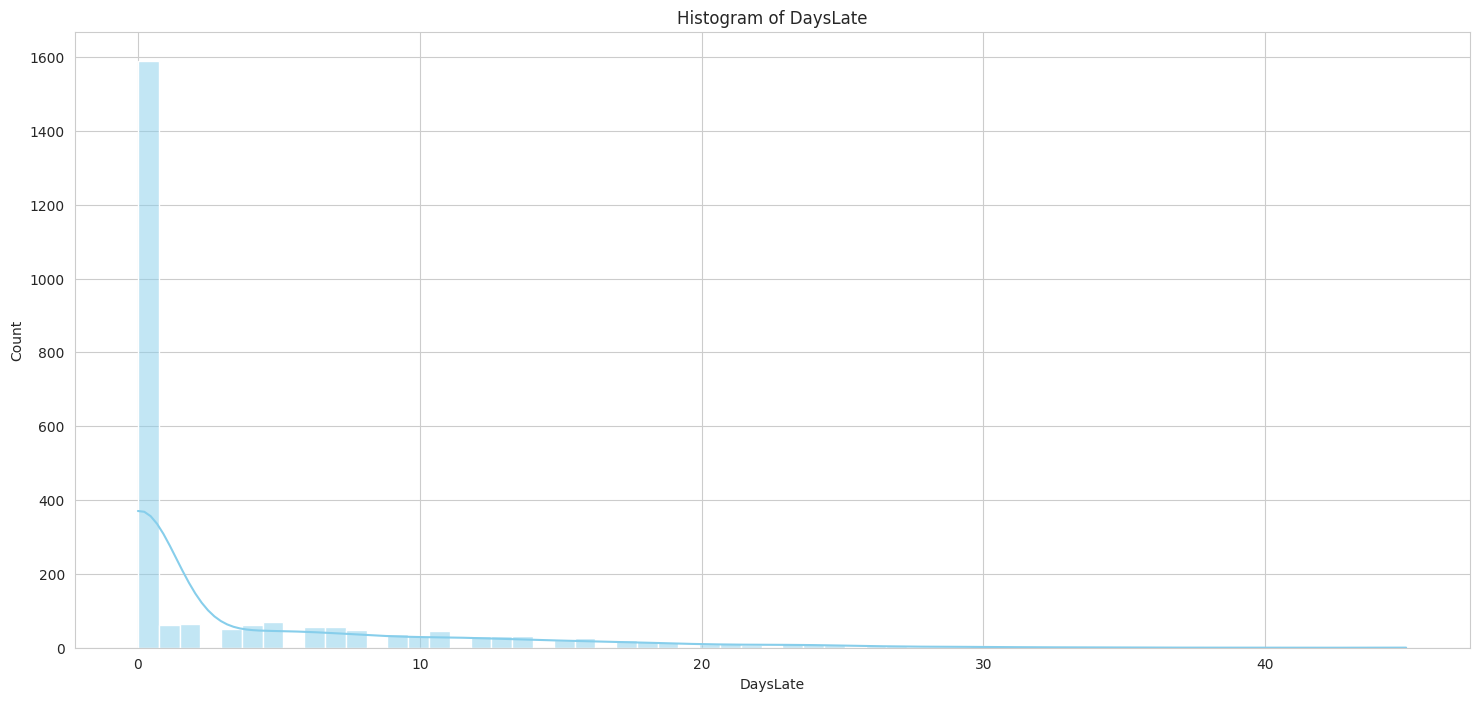

In [318]:
# Histogram of DaysLate
sns.histplot(df['DaysLate'], kde=True, color='skyblue')
plt.title('Histogram of DaysLate')
plt.show()

In [319]:
df.head(1)

,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,year,countryName
0,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,2013,Germany


In [320]:
groups = [df[df['DaysToSettle'] < 30]['InvoiceAmount'].sum(),
          df[(df['DaysToSettle'] > 30) & (df['DaysToSettle'] < 60)]['InvoiceAmount'].sum(),
          df[(df['DaysToSettle'] > 60) & (df['DaysToSettle'] < 90)]['InvoiceAmount'].sum(),
          df[df['DaysToSettle'] == 90]['InvoiceAmount'].sum()]

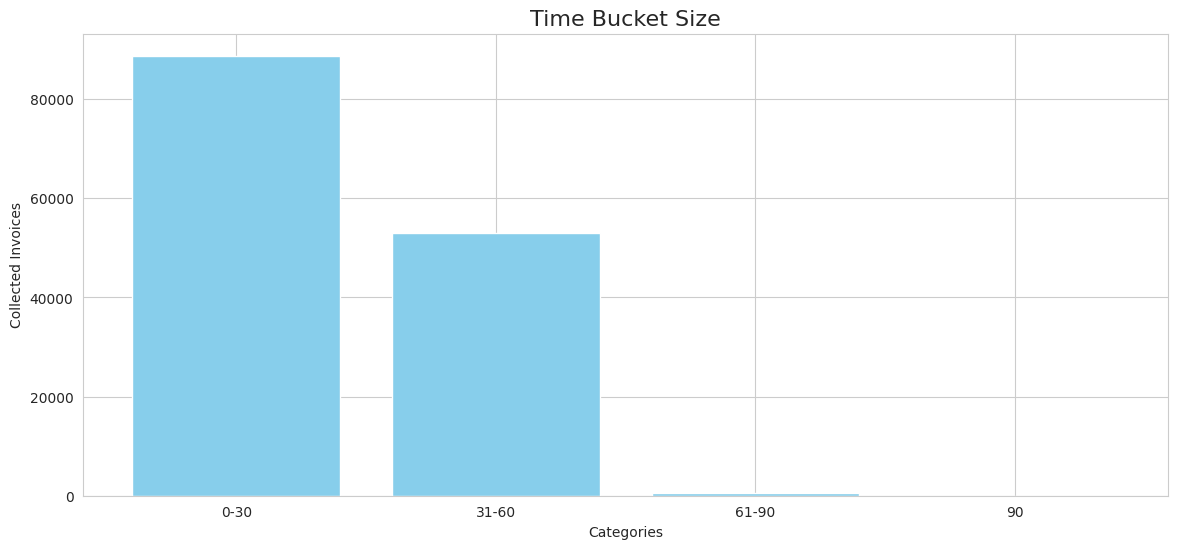

In [321]:
categories = ['0-30', '31-60', '61-90', '90']

plt.figure(figsize=(14, 6))
plt.bar(categories, groups, color='skyblue')
plt.title('Time Bucket Size', fontsize=16)
plt.xlabel('Categories')
plt.ylabel('Collected Invoices')
plt.show()

Most of the payments are collected within a month and the maximum often 60 days

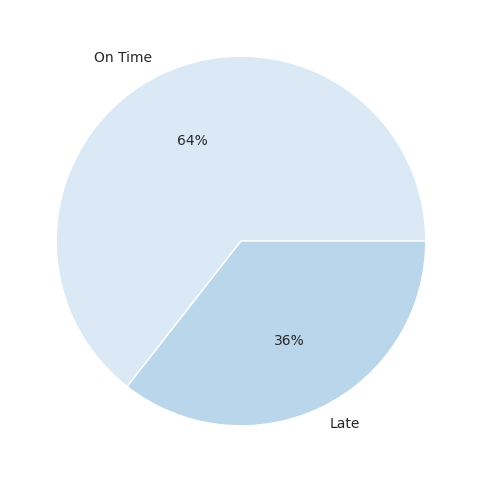

In [322]:
on_time = df[df['DaysLate'] == 0]['customerID'].count()
late = df[df['DaysLate'] != 0 ]['customerID'].count()
labels = ['On Time', 'Late']

plt.figure(figsize = (16,6))
colors = sns.color_palette('Blues')
pie = plt.pie([on_time, late], labels = labels, autopct = '%0.0f%%',colors = colors)

# Feature Engineering

In [323]:
#Split data , Year and month

df['PaperlessDate'] = pd.to_datetime(df['PaperlessDate'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DueDate'] = pd.to_datetime(df['DueDate'])
df['SettledDate'] = pd.to_datetime(df['SettledDate'])

date_columns = ['PaperlessDate','InvoiceDate','DueDate','SettledDate']

df['PaperlessDate_year'] = df['PaperlessDate'].dt.year
df['PaperlessDate_day'] = df['PaperlessDate'].dt.day
df['PaperlessDate_month'] = df['PaperlessDate'].dt.month

df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day

df['DueDate_year'] = df['DueDate'].dt.year
df['DueDate_month'] = df['DueDate'].dt.month
df['DueDate_day'] = df['DueDate'].dt.day

df['SettledDate_year'] = df['SettledDate'].dt.year
df['SettledDate_month'] = df['SettledDate'].dt.month
df['SettledDate_day'] = df['SettledDate'].dt.day

In [324]:
df.drop(['customerID','invoiceNumber','SettledDate','InvoiceDate','PaperlessDate','DueDate'], axis = 1, inplace = True)

In [325]:
category = ['countryName']
encoded_categ = pd.get_dummies(df[category] ,drop_first=True)

df['Disputed'] = df['Disputed'].replace({'Yes':1, 'No':0})
df['PaperlessBill'] = df['PaperlessBill'].replace({'Electronic':1, 'Paper':0})
df = pd.concat([df, encoded_categ], axis = 1)
df = df.drop(columns = category, axis = 1)

In [326]:
df.head()

,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate,year,PaperlessDate_year,PaperlessDate_day,PaperlessDate_month,InvoiceDate_year,...,DueDate_year,DueDate_month,DueDate_day,SettledDate_year,SettledDate_month,SettledDate_day,"countryName_California, US","countryName_Georgia, US",countryName_Germany,"countryName_Kansas, US"
0,55.94,0,0,13,0,2013,2013,6,4,2013,...,2013,2,1,2013,1,15,0,0,1,0
1,61.74,1,1,36,6,2013,2012,3,3,2013,...,2013,2,25,2013,3,3,0,0,0,0
2,65.88,0,1,5,0,2013,2012,26,1,2013,...,2013,8,2,2013,7,8,0,0,1,0
3,105.92,0,1,35,5,2013,2012,6,4,2013,...,2013,3,12,2013,3,17,0,0,0,0
4,72.27,1,0,34,4,2012,2012,26,11,2012,...,2012,11,24,2012,11,28,1,0,0,0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InvoiceAmount               2466 non-null   float64
 1   Disputed                    2466 non-null   int64  
 2   PaperlessBill               2466 non-null   int64  
 3   DaysToSettle                2466 non-null   int64  
 4   DaysLate                    2466 non-null   int64  
 5   year                        2466 non-null   int64  
 6   PaperlessDate_year          2466 non-null   int64  
 7   PaperlessDate_day           2466 non-null   int64  
 8   PaperlessDate_month         2466 non-null   int64  
 9   InvoiceDate_year            2466 non-null   int64  
 10  InvoiceDate_month           2466 non-null   int64  
 11  InvoiceDate_day             2466 non-null   int64  
 12  DueDate_year                2466 non-null   int64  
 13  DueDate_month               2466 

#Checking Correlation

In [328]:
df.head(1)

,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate,year,PaperlessDate_year,PaperlessDate_day,PaperlessDate_month,InvoiceDate_year,...,DueDate_year,DueDate_month,DueDate_day,SettledDate_year,SettledDate_month,SettledDate_day,"countryName_California, US","countryName_Georgia, US",countryName_Germany,"countryName_Kansas, US"
0,55.94,0,0,13,0,2013,2013,6,4,2013,...,2013,2,1,2013,1,15,0,0,1,0


In [329]:
corr=df.corr()

<Axes: >

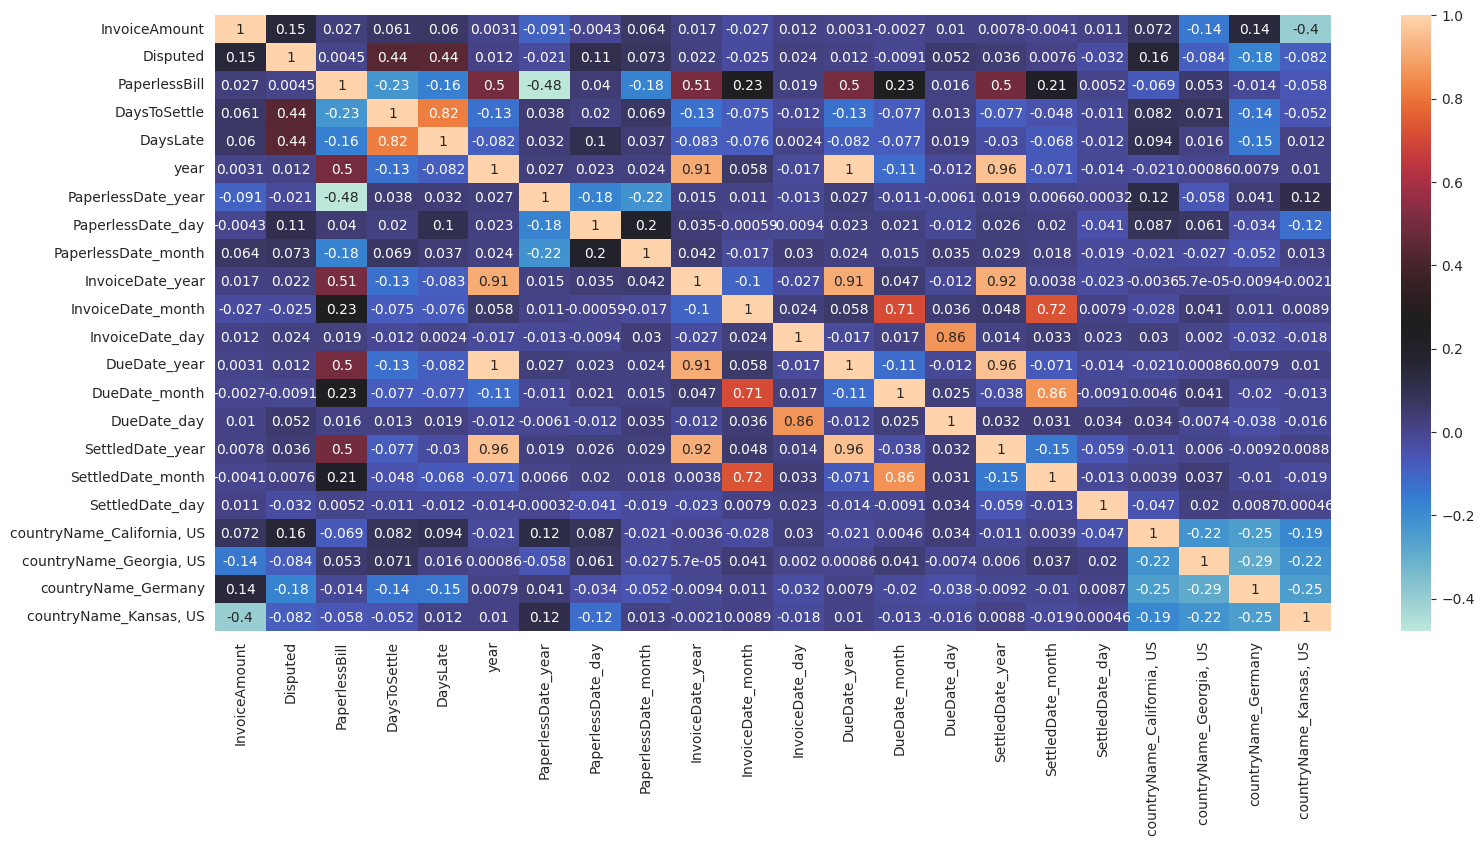

In [330]:
sns.heatmap(corr,annot=True,cmap = 'icefire')

# Split Dataset for Training and Testing

In [331]:
X=df.drop(['DaysLate'],axis=1)
y=df['DaysLate']

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .2, random_state = 44)

In [333]:
scaler=MinMaxScaler()
scaler_x=scaler.fit_transform(X)


#Modelling

In [369]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
gbc = GradientBoostingRegressor()
gnb = GaussianNB()
abc = AdaBoostRegressor()

In [367]:
for model in [lr,dt,rf,knn,gbc,gnb,abc]:
    print('**********\t',model)
    fit=model.fit(X_train,y_train)
    Y_pred_train=fit.predict(X_train)
    Y_pred_test=fit.predict(X_test)
    mse_train = mean_squared_error(y_train, Y_pred_train)
    mse_test = mean_squared_error(y_test, Y_pred_test)
    r2_train = r2_score(y_train, Y_pred_train)
    r2_test = r2_score(y_test, Y_pred_test)
    explained_variance = explained_variance_score(y_test, Y_pred_test)


    print("Training Mean Squared Error\t:", mse_train)

    print("Test Mean Squared Error\t:", mse_test)


    print("Training R2 Score\t:", r2_train)

    print("Test R2 Score\t:", r2_test)

**********	 LinearRegression()
Training Mean Squared Error	: 11.751606935577392
Test Mean Squared Error	: 12.926433035955071
Training R2 Score	: 0.6995156837576444
Test R2 Score	: 0.6872246050430189
**********	 DecisionTreeRegressor()
Training Mean Squared Error	: 0.0
Test Mean Squared Error	: 0.004048582995951417
Training R2 Score	: 1.0
Test R2 Score	: 0.9999020381614903
**********	 RandomForestRegressor()
Training Mean Squared Error	: 0.007673123732251531
Test Mean Squared Error	: 0.005452834008097162
Training R2 Score	: 0.9998038010162552
Test R2 Score	: 0.9998680600978032
**********	 KNeighborsRegressor()
Training Mean Squared Error	: 1.6606693711967546
Test Mean Squared Error	: 2.333846153846154
Training R2 Score	: 0.957537288028417
Test R2 Score	: 0.943528918572692
**********	 GradientBoostingRegressor()
Training Mean Squared Error	: 1.5914337176095643e-07
Test Mean Squared Error	: 0.004956132514053453
Training R2 Score	: 0.9999999959307618
Test R2 Score	: 0.9998800785723153
****

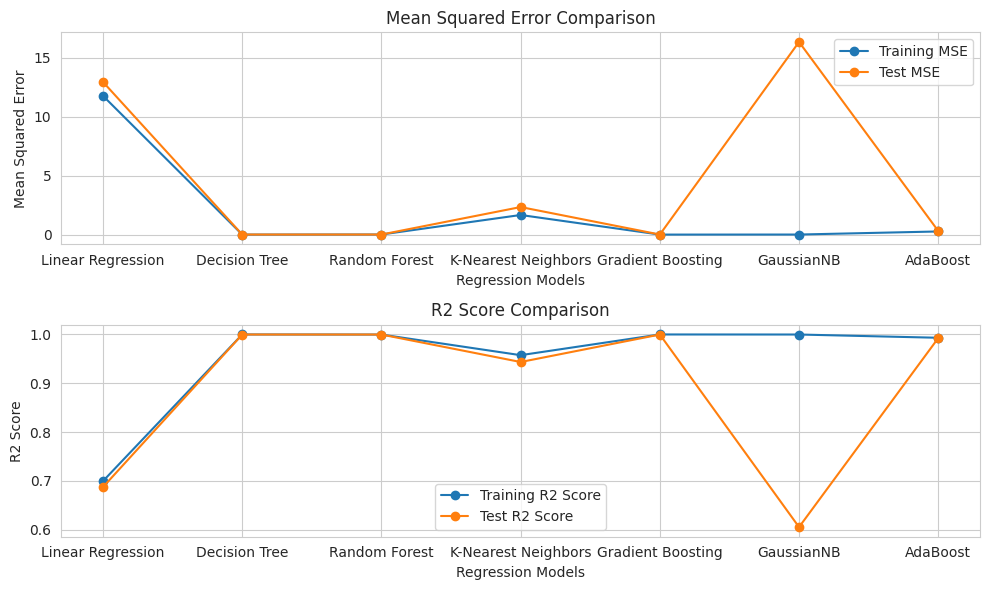

In [370]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Gradient Boosting', 'GaussianNB', 'AdaBoost']

training_mse = [11.751606935577392, 0.0, 0.007673123732251531, 1.6606693711967546, 1.5914337176095643e-07, 0.004563894523326572, 0.2648658964424423]
test_mse = [12.926433035955071, 0.004048582995951417, 0.005452834008097162, 2.333846153846154, 0.004956132514053453, 16.31983805668016, 0.30789075091803697]
training_r2 = [0.6995156837576444, 1.0, 0.9998038010162552, 0.957537288028417, 0.9999999959307618, 0.9998833028765545, 0.9932274753380768]
test_r2 = [0.6872246050430189, 0.9999020381614903, 0.9998680600978032, 0.943528918572692, 0.9998800785723153, 0.6051158289673555, 0.9925500986270436]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(models, training_mse, marker='o', label='Training MSE')
plt.plot(models, test_mse, marker='o', label='Test MSE')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(models, training_r2, marker='o', label='Training R2 Score')
plt.plot(models, test_r2, marker='o', label='Test R2 Score')
plt.title('R2 Score Comparison')
plt.xlabel('Regression Models')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


#Conclusion
From the visualization of the various regression models, it is evident that certain models perform exceptionally well in both the training and testing phases. The Decision Tree, Random Forest, and Gradient Boosting models showcase notably low mean squared error and high R2 scores in both training and testing, indicating robust predictive capabilities and generalization to unseen data. Conversely, the K-Nearest Neighbors model demonstrates relatively higher errors, suggesting a need for further optimization or potentially reconsidering its use in the context of this data. GaussianNB and AdaBoost models also perform relatively well but exhibit slightly higher errors compared to the top-performing models. The Linear Regression model displays moderate performance, with a similar pattern of higher errors compared to the top-performing models.

In summary, for this specific dataset, Decision Tree, Random Forest, and Gradient Boosting models are the most suitable options due to their strong predictive power and generalization ability, making them prime candidates for future use in similar regression tasks. Further fine-tuning and exploration can potentially enhance the performance of the other models as well.